<br>

## FUNDAMENTALS OF DATA ANALYSIS PROJECT 2020

In this notebook I am creating my project for the module Fundamentals of Data Analysis 2020. 
Please find below a description of the project( instructions for the project to be deleted before last commit), references and the code explained with markdown cells 





***
References

- [What is linear regression?](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/)

- [Multiple lines chart documentation](https://python-graph-gallery.com/122-multiple-lines-chart/)

- [Linear regression with example](https://towardsdatascience.com/linear-regression-with-example-8daf6205bd49)

- [Numpy polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

- [Simple Linear Regression Lecturer's github](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)

- [Deep learning for beginners linear regression cost function](https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f)

- [Non-linear regression model for wind turbine journal](https://www.vdu.lt/wp-content/uploads/2018/02/Marciukaitis-2017-Non-linear-regression-model-for-wind-turbine-power-curve.pdf)

***

<br>

### Project instructions

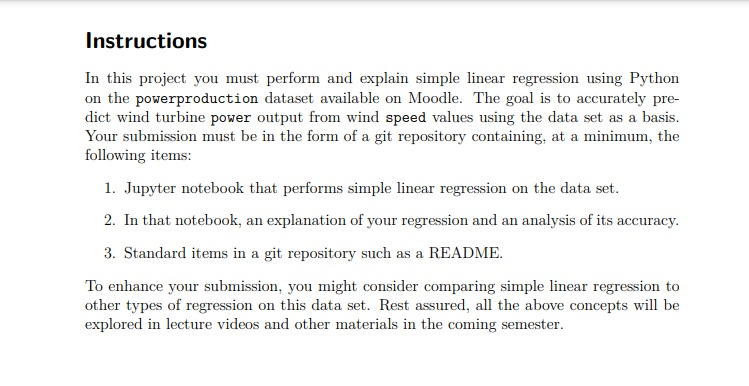

<br>

### Purpose of this project


My intention with this assignment is analyse the data from the 'powerproduction' dataset, in order to accurately predict wind turbine power output from wind speed values. 

In order to do so I will perform a simple linear regression on the dataset in this notebook, adding an explanatio of my regression and analysing its accuracy. 

To go a little bit further I will also compare this type of regression to other types of regression using this dataset. 


<br>

#### What is linear regression? 

Before we start working with this dataset, I would like to offer a brief explanation of what linear regression is and maybe add some examples in order to understand better what we expect to see when using the 'Powerproduction' dataset analysis. 

A simple definition that I found on this [source](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/) is that this kind of regression is a way to model a relationship between two sets of variables. Using the regression model, we can model the nature of the dependen variable and forecast its behaviour as the independent variable changes.
In this case, we want to be able to perform linear regression on this dataset to predict how much wind speed we need to create a specific amount of power/electricity. 

Furthermore we will algo discuss whether linear regression is the best option for this specific dataset and compare with with another type of regression ( maybe a curve regression by the looks of the dataset initially). 



### Analsysis


#### Preparing dataset

The first setp on this analysis is to load the 'powerproduction' dataset and have a look into it using descriptive statistics.
This dataset represents the relation between speed and power produced in a wind turbine. 
Let's see this information in the code cells below: 

In [11]:
#I imported necessary modules to organize data and perform descriptive statistics

import pandas as pd #imported to organize data 
import numpy as np #for array of numbers 
import matplotlib.pyplot as plt # imported for plotting

#loading dataset with pandas


data=pd.read_csv(r'C:\Users\fainl\OneDrive\Documents\GMITSEP2020\Fundamentals-Project\Powerproduction dataset.csv')  

#print(data)

#converting this dataset into dataframe with pandas 

powerdata=pd.DataFrame (data, columns = ['speed','power'])

print(powerdata)



      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [13]:
#initially describing dataset using pandas functionalities

powerdata.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


 <br>
 
Below we can see a summary of the data using the function describe from pandas. Mean for speed is 12.59 while power is 48.01 , std 7.22 for speed while 41.61 for power. 

Now I am going to plot this data to see the correlation between speed and power. 

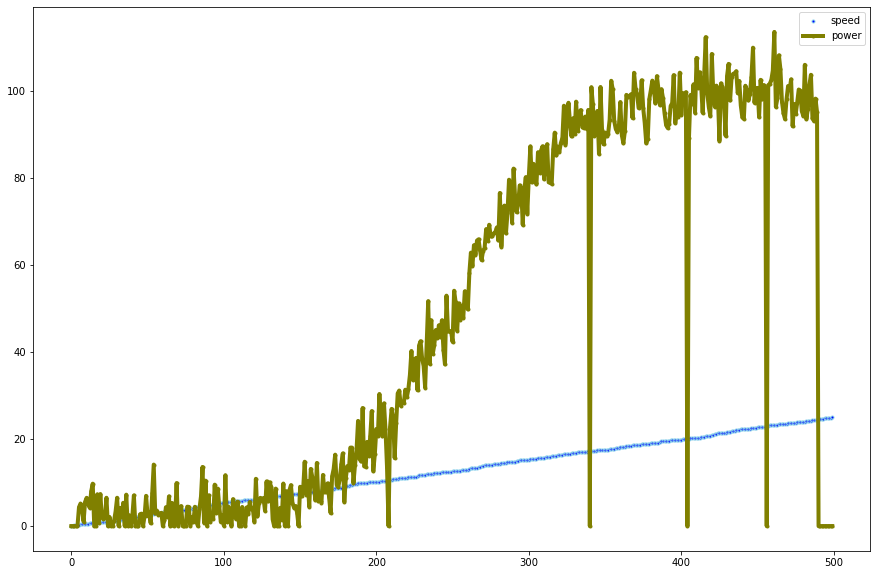

In [43]:
#Plotting dataset initially: 

#resizing
plt.rcParams['figure.figsize']=([15, 10])

#plotting, speed is shown blue dots while power is the green section
plt.plot( 'speed', 'y1', data=powerdata, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
plt.plot( 'power', 'y2', data=powerdata, marker='.', color='olive', linewidth=4)


plt.legend()

plt.show()



Initially it seems that the power and the speed were closely related until the moment that power reached the 20 and speed reached the 150 where it augmented for both and they seem to have followed different trends( sorry right now I am just looking at this data). Looking at the initial shape, does not seem that this dataset is suitable for linear regression given its shape. However I am going to proceed to create a line of bes fit for these variables and see how it behaves. 

See code cells below with explanation for the line of best fit created using numpy package as taught in our lectures. 

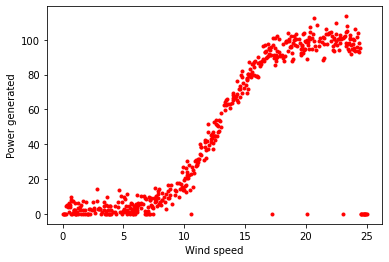

In [56]:
#following lecture's video in how to create a line of best fit I tried to fit a line between both variables using 
#numpy polyfit function

# Matplotlib interactive plots
%matplotlib inline

#lets consider the wind speed as the independent variable as the power
#generated by the turbines depends on it

#first I separate the 2 variables to represent them 

power=powerdata['speed']
speed=powerdata['power']

plt.plot(power,speed, 'r.')

#labels 
plt.xlabel('Wind speed')
plt.ylabel('Power generated')

plt.show()

<br>

Again observing this plot , the dataset is creating a curve and seems very complicated to create a line of best fit. However I am using the regression equation 'y=a + bx' in below cells in order to try to fit the model.

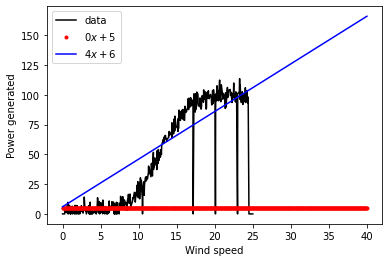

In [72]:


#now adding some lines to this plot using the regression equation
#above mentioned in addition to numpy linspace for 'x'

plt.plot(power,speed, 'k-', Label='data')

# Overlay some lines on the plot.
x = np.linspace(0.0,40,500)
plt.plot(x, 0.0 *x + 5.0, 'r.', label=r"$0x+ 5$")
plt.plot(x, 4.0 * x + 6.0, 'b-', label=r"$4x + 6$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Wind speed')
plt.ylabel('Power generated')

# Show the plot.
plt.show()

<br> 
#### Calculating this cost

Creating these 2 lines over our data we can see that there is not line of best fit possible for the two variables. 

Next I am going to calculate the cost. The **Cost function** in linear regression refers to the function that quantifies the error between predicted values and expected values and presents it in the form of a single real number [source](https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f).

We can perform this operation using one of numpy modules called **numpy polyfit**. What numpy polyfit does is to return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0. 
Let's see an example with this data below:

In [68]:
#using polyfit function

np.polyfit(power, speed, 1)

array([  4.91759567, -13.89990263])

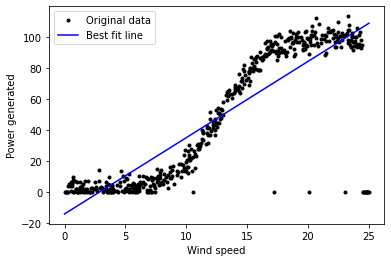

In [73]:
#then using these values, we plot the line on top of our data now

plt.plot(power, speed, 'k.', label='Original data')
plt.plot(power, 4.91759567 * power + -13.89990263, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Wind speed')
plt.ylabel('Power generated')
plt.legend()

# Show the plot.
plt.show()